课程内容的每周概括：

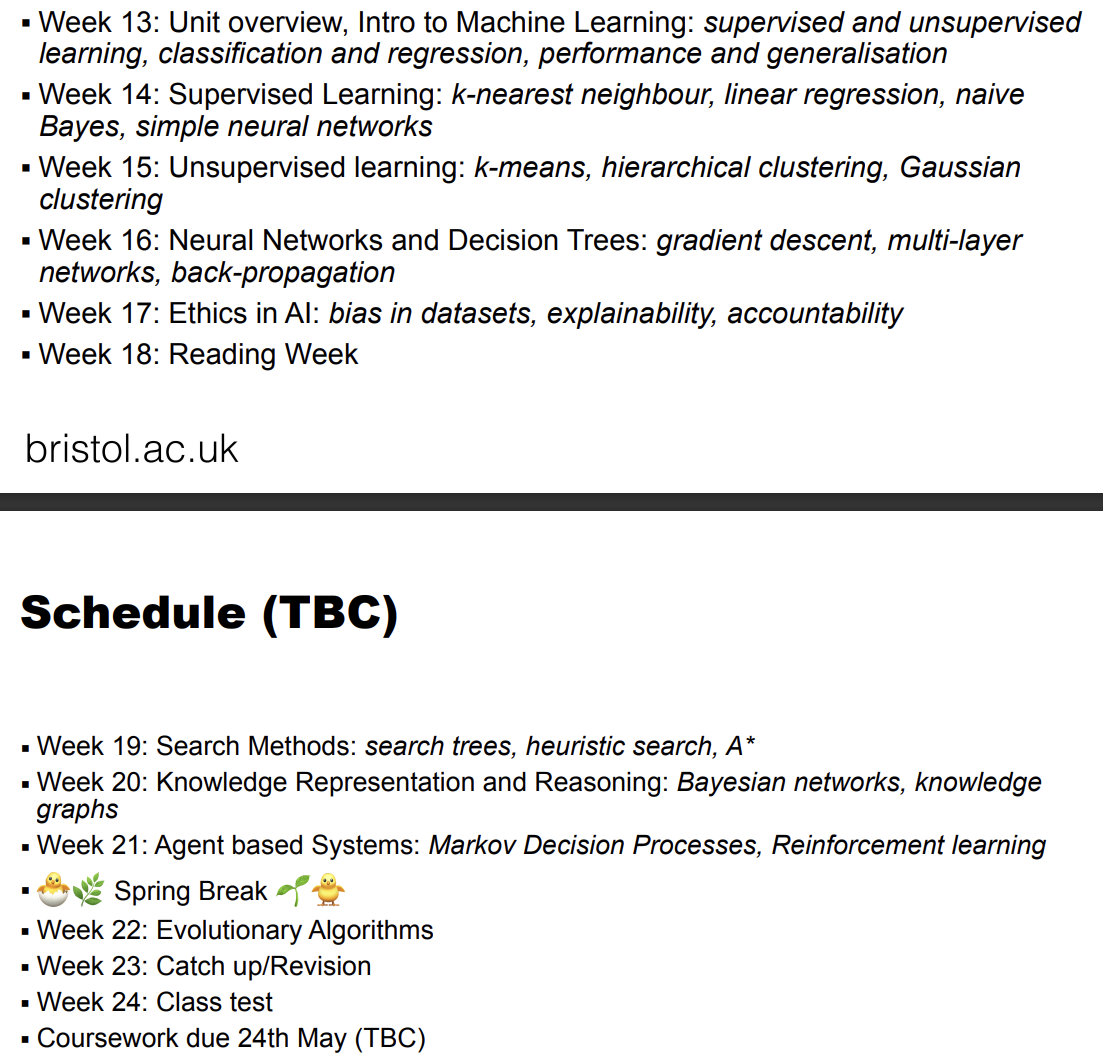

# 本周内容的概括：
 - 学习问题的类型
 - 分类vs回归
 - 性能指标
 - 泛化和过拟合
 - 训练，验证，测试

# 1. 学习问题的类型
- 有监督的学习  
- 无监督的学习
- 强化学习

# 2. 有监督的学习：
使用有label的数据训练  
两个步骤：训练/学习，预测/推论  
实质：训练一个未知的函数：
$$
f:V \rightarrow O
$$
$V$：一个n维的feature空间  
>    - 每一种标签就算有一维  
>    - 标签举例：有没有腿，有没有手，能不能跑，是不是狗，是不是猫  

$O$：一个输出空间，通常是一维
  
  
训练的目标：近似得到一个函数$f$，使此函数能从数据返回正确的label  

例子：
> MNIST图像分类：
>  - 输入：28x28的图像，被压缩成一个724的一维向量作为输入  
>  - 输出：0-9之间的一个数字  

> 房价预测：
>  - 输入：四维实数：industry，rooms，tax，crime
>  - 输出：一维实数：房价

# 3. 无监督的学习  

用无label的数据训练  
把数据喂给模型，模型根据数据点之间的相似度，把数据分割成若干点云  
在数据空间中识别未知的pattern  
数据点（其实是数据向量）之间的距离是一个重要的概念  
数据之间的相似度和距离概念起主导作用  
例子：
> 信息检索
> - 对文件聚类
> - 检索相似的文件
> - feature空间是一组词汇
> - 用矢量空间来表示文件

> 诈骗信息检测
> - 对转账的聚类
> - 标示出离群点
> - 样本空间可以包含位置，商家，日期等 

# 4. 分类vs回归

首先，这俩都属于受监督的学习  
他俩的主要区别在于输出空间不同  

> 分类：
> - 将输入分为若干个class。比如：猫/狗/鸟
> - 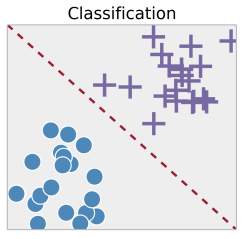
> - 输出是若干class：$O = \{c_1,c_2,c_3,...,c_k\}$

> 回归：
> - 找到一个能代表数据模式的函数（what the data is doing?）
> - 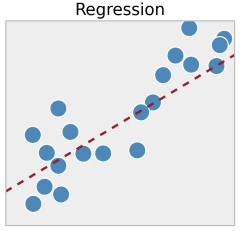
> - 输出是一条实数空间中的线（real line）: $O=R$，如上图中的红线

> 例子：
> - MNIST问题：分类问题
> - 场景气氛标签分析：两种皆可
>   - 如果$O = \{positive, neutral, negative\}$，就属于分类问题
>   - 如果$O \in [0,1]$，就属于回归问题
> - 房价预测：回归问题

# 5. 性能指标
## 5.1. 分类的性能指标

|类型|预测|实际|
|:-:|:-:|:-:|
|TP|T|T|
|TN|F|F|
|FP|T|F|
|FN|F|T|

<br></br>
下方表格横行为预测值，纵行为真值

||猫|不是猫|
|:-:|:-:|:-:|
|猫|TP|FN|
|不是猫|FP|TN|

精确度（Accuracy）：$Accuracy = \frac{TP+TN}{Total} = \frac{正确标记的个体}{总个体数}$，即上方表格中的对角线元素
